# demo03_iris.ipynb  鸢尾花数据分析及预测

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sklearn.datasets as sd
iris = sd.load_iris()

data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target
data.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [3]:
data.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.054000           3.758667   
std             0.828066          0.433594           1.764420   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.198667    1.000000  
std            0.763161    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000

In [4]:
# 基于透视表完成简单数据统计分析
data.pivot_table(index='target')

petal length (cm)  petal width (cm)  sepal length (cm)  \
target                                                           
0                   1.464             0.244              5.006   
1                   4.260             1.326              5.936   
2                   5.552             2.026              6.588   

        sepal width (cm)  
target                    
0                  3.418  
1                  2.770  
2                  2.974

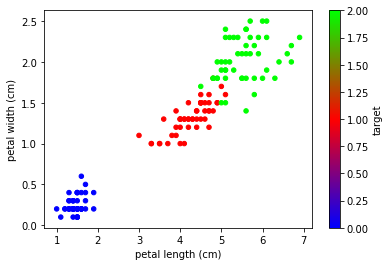

In [5]:
# 可视化
data.plot.scatter(x='petal length (cm)', y='petal width (cm)', 
                 c='target', cmap='brg', s=20)

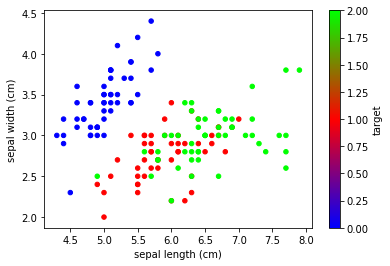

In [6]:
# 可视化
data.plot.scatter(x='sepal length (cm)', y='sepal width (cm)', 
                 c='target', cmap='brg', s=20)

In [22]:
import sklearn.model_selection as ms
import sklearn.linear_model as lm
# 整理输入集输出集，拆分测试集训练集 
x, y = data.iloc[:, :-1], data['target']
# 训练模型
train_x, test_x, train_y, test_y = \
    ms.train_test_split(x, y, test_size=0.2, random_state=7, stratify=y)
model = lm.LogisticRegression()

# 做5次交叉验证
scores = ms.cross_val_score(model, x, y, cv=5, scoring='accuracy')
print(scores.mean())
scores = ms.cross_val_score(model, x, y, cv=5, scoring='precision_weighted')
print(scores.mean())
scores = ms.cross_val_score(model, x, y, cv=5, scoring='recall_weighted')
print(scores.mean())
scores = ms.cross_val_score(model, x, y, cv=5, scoring='f1_weighted')
print(scores.mean())

0.9600000000000002
0.9652214452214454
0.9600000000000002
0.959522933505973


In [23]:
model.fit(train_x, train_y)
# 评估  模型准确率
pred_test_y = model.predict(test_x)
print((pred_test_y==test_y).sum() / test_y.size)
print(test_y.values)

0.9333333333333333
[2 0 0 1 2 1 2 0 2 2 1 0 0 1 1 1 0 0 1 1 2 0 1 0 2 2 2 1 0 2]


## 针对测试集结果，评估

In [24]:
import sklearn.metrics as sm
m = sm.confusion_matrix(test_y, pred_test_y)
print(m)

[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


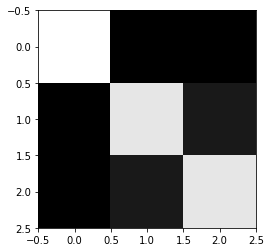

In [26]:
plt.imshow(m, cmap='gray')

## 输出分类报告

In [27]:
cr = sm.classification_report(test_y, pred_test_y)
print(cr)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       0.90      0.90      0.90        10
          2       0.90      0.90      0.90        10

avg / total       0.93      0.93      0.93        30



# 决策树分类模型

In [30]:
import sklearn.tree as st
model = st.DecisionTreeClassifier(max_depth=3, min_samples_split=3)
model.fit(train_x, train_y)
# 评估  模型准确率
pred_test_y = model.predict(test_x)
print((pred_test_y==test_y).sum() / test_y.size)
print(test_y.values)

0.9666666666666667
[2 0 0 1 2 1 2 0 2 2 1 0 0 1 1 1 0 0 1 1 2 0 1 0 2 2 2 1 0 2]
